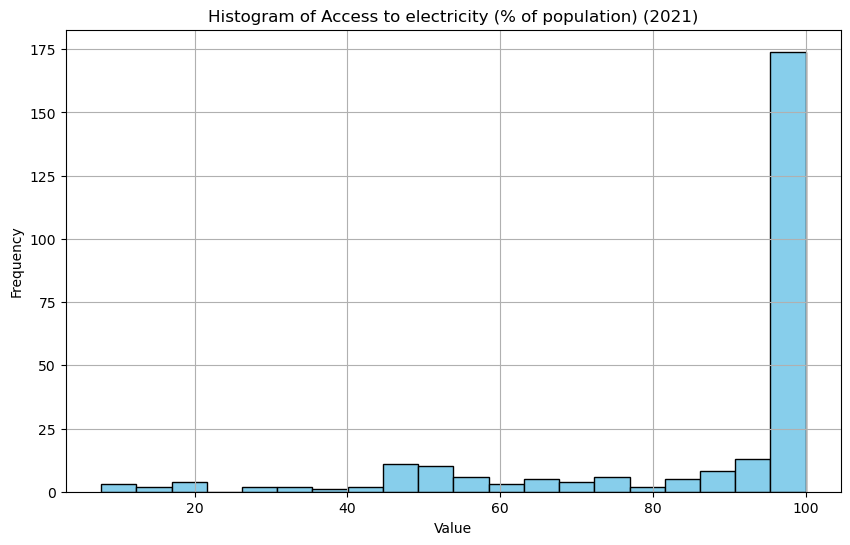

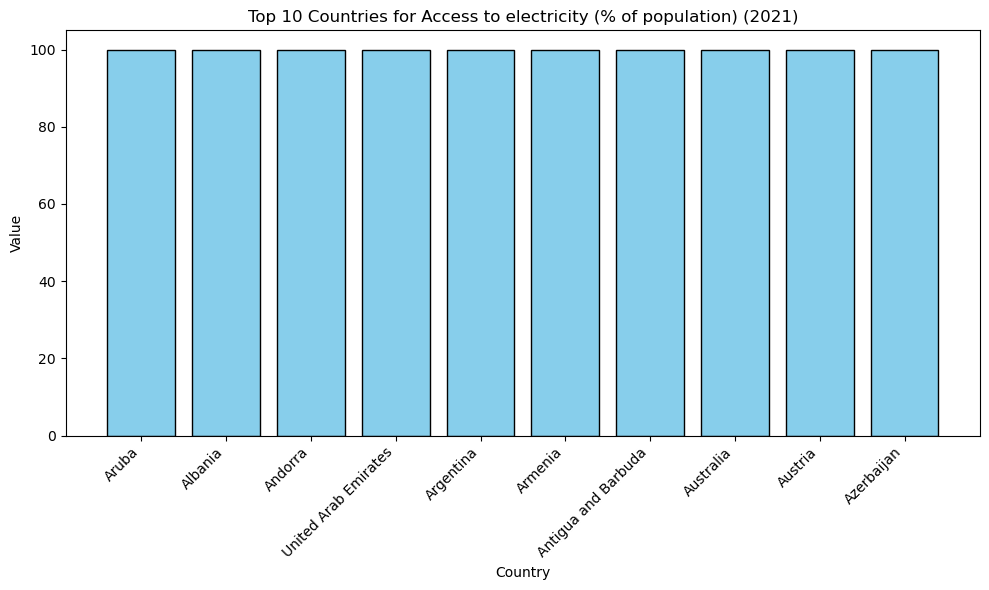

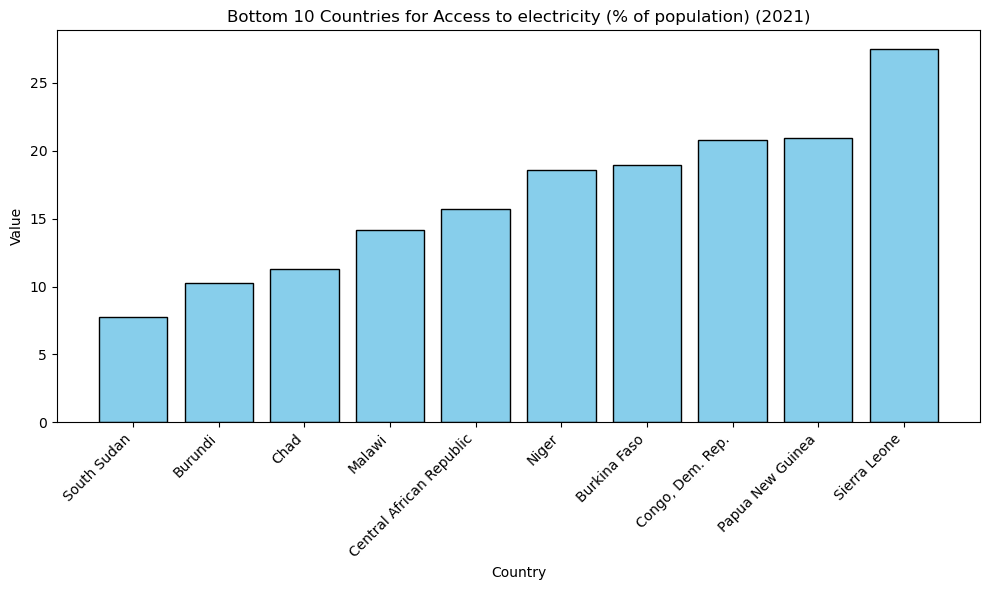

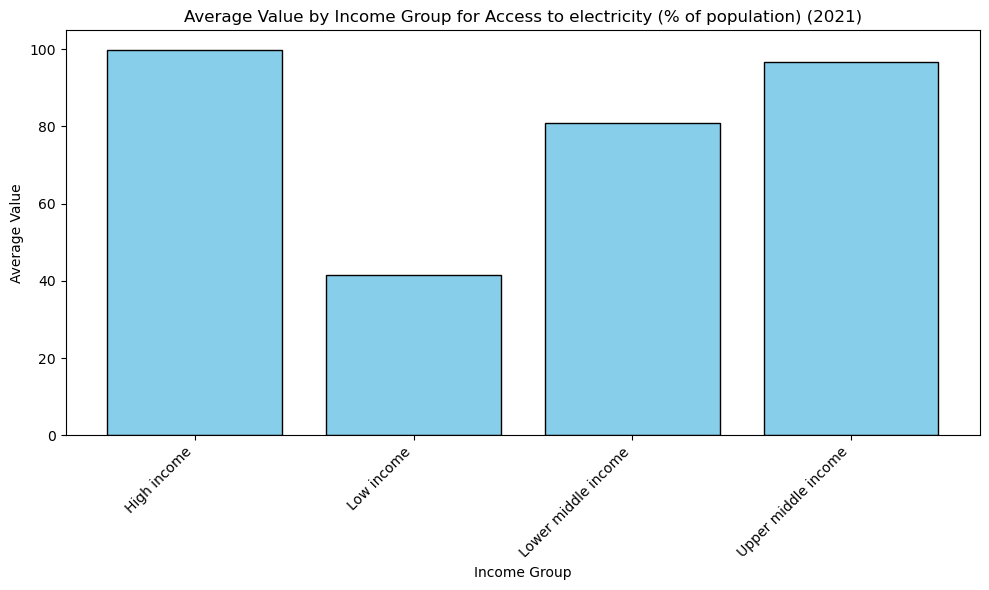

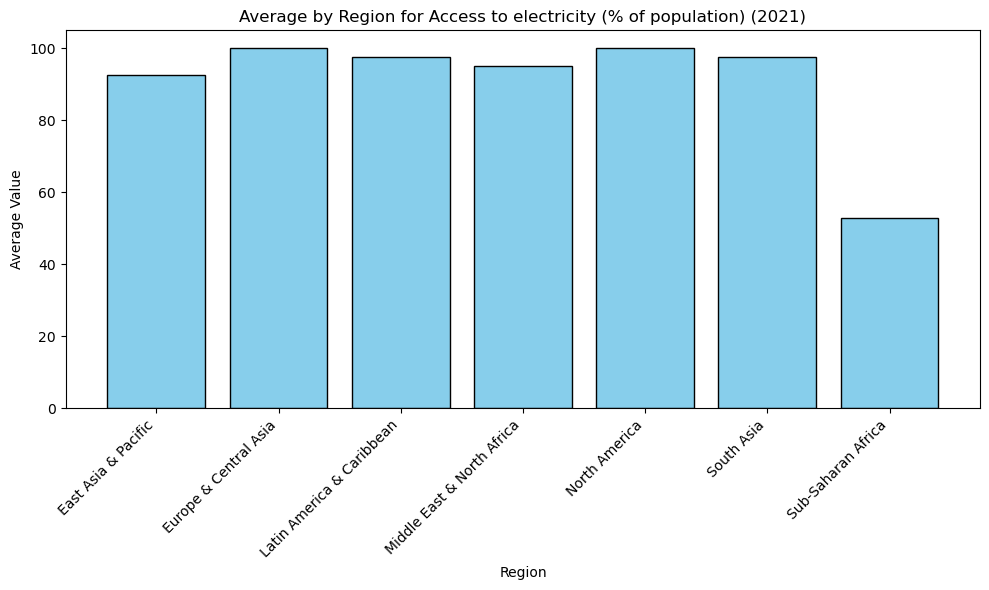

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to create a histogram
def create_histogram(data, column_name, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid()
    plt.show()

# Function to create a bar plot
def create_bar_plot(data, x_column, y_column, xlabel, ylabel, title, rotation=True):
    plt.figure(figsize=(10, 6))
    plt.bar(data[x_column], data[y_column], color='skyblue', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_histogram(data, year, indicator_name):
    title = f'Histogram of {indicator_name} ({year})'
    create_histogram(data, year, title)

def plot_top_10(data, x_column, year, indicator_name):
    title = f'Top 10 Countries for {indicator_name} ({year})'
    top_countries_data = data.nlargest(10, year)[[x_column, year]]
    create_bar_plot(top_countries_data, x_column, year, 'Country', 'Value', title, rotation=False)

def plot_bottom_10(data, x_column, year, indicator_name):
    title = f'Bottom 10 Countries for {indicator_name} ({year})'
    bottom_countries_data = data.nsmallest(10, year)[[x_column, year]]
    create_bar_plot(bottom_countries_data, x_column, year, 'Country', 'Value', title, rotation=False)

def plot_by_income_group(data, country_metadata, x_column, year, indicator_name):
    title = f'Average Value by Income Group for {indicator_name} ({year})'
    income_group_data = data.merge(country_metadata[['Country Code', 'IncomeGroup']], on='Country Code')
    income_group_means = income_group_data.groupby('IncomeGroup')[year].mean().reset_index()
    create_bar_plot(income_group_means, 'IncomeGroup', year, 'Income Group', 'Average Value', title)

def plot_by_region(data, country_metadata, x_column, year, indicator_name):
    title = f'Average by Region for {indicator_name} ({year})'
    region_data = data.merge(country_metadata[['Country Code', 'Region']], on='Country Code')
    region_means = region_data.groupby('Region')[year].mean().reset_index()
    create_bar_plot(region_means, 'Region', year, 'Region', 'Average Value', title)



def read_and_visualize_data(folder_path, data_file, country_metadata_file, indicator_metadata_file, year):
    data = pd.read_csv(os.path.join(folder_path, data_file), skiprows=4)
    country_metadata = pd.read_csv(os.path.join(folder_path, country_metadata_file))
    indicator_metadata = pd.read_csv(os.path.join(folder_path, indicator_metadata_file))
    
    indicator_name = indicator_metadata['INDICATOR_NAME'][0]
    
    plot_histogram(data, year, indicator_name)
    plot_top_10(data, 'Country Name', year, indicator_name)
    plot_bottom_10(data, 'Country Name', year, indicator_name)
    plot_by_income_group(data, country_metadata, 'Country Name', year, indicator_name)
    plot_by_region(data, country_metadata, 'Country Name', year, indicator_name)
    

# Call the function with the appropriate file paths and year
read_and_visualize_data("DATASETS/Access to electricity (% of population)",
                     "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                     '2021')  # Change to the desired year
